In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [5]:
data=pd.read_csv("winequality-red.csv",sep=";")


In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
feature_list=data.columns[:-1].values
label=[data.columns[-1]]
print("feature list:",feature_list)
print("label",label)

feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
label ['quality']


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0, 0.5, 'count')

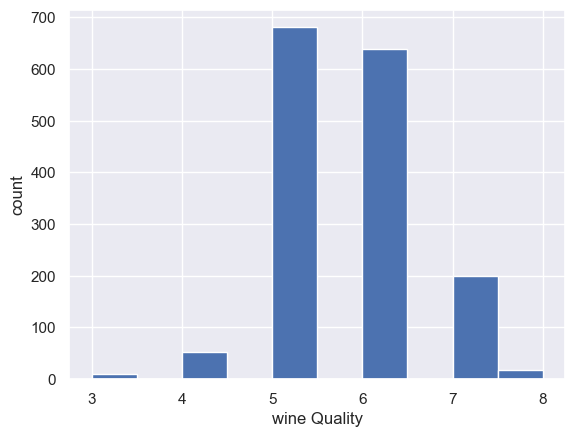

In [13]:
sns.set()
data.quality.hist()
plt.xlabel("wine Quality")
plt.ylabel("count")

In [15]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(data, 0.2)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(data, data["quality"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [27]:
strat_dist=strat_test_set["quality"].value_counts()/len(strat_test_set)

In [28]:
overall_dist=data["quality"].value_counts()/len(data)
dist_comparision=pd.DataFrame({'overall':overall_dist,'stratified':strat_dist})
dist_comparision['diff(s-o)']=dist_comparision['stratified']-dist_comparision['overall']
dist_comparision['diff(s-o)_pct']=100*(dist_comparision['diff(s-o)']/dist_comparision['overall'])

In [29]:
dist_comparision

,overall,stratified,diff(s-o),diff(s-o)_pct
quality,,,,
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


In [30]:
random_dist=test_set["quality"].value_counts()/len(test_set)
random_dist

quality
6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: count, dtype: float64

In [31]:
dist_comparision['diff(r-o)']=random_dist-dist_comparision['overall']
dist_comparision['diff(r-o)_pct']=100*(dist_comparision['diff(r-o)']/dist_comparision['overall'])

In [32]:
dist_comparision.loc[:,['diff(s-o)_pct','diff(r-o)_pct']]

,diff(s-o)_pct,diff(r-o)_pct
quality,,
5,-0.209251,-4.611784
6,0.250784,3.383621
7,0.439698,5.461683
4,3.708726,-5.719340
8,-16.718750,38.802083
3,-0.062500,-50.031250
